### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

### Set-up

In [2]:
# we will read the dataset that we created in the previous exercise
df = pd.read_csv("winequality.csv", encoding='ISO-8859-1')
df = df.drop(df.columns[0],axis=1)


sns.set(style='darkgrid')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [4]:
df['quality']=pd.to_numeric(df['quality'])

df['test']=0

In [5]:

mask = (df['quality']>7)

df['test'][mask] = 1

/Users/liz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df.groupby('test').describe()

fixed acidity                                               \
             count     mean       std  min  25%  50%  75%   max   
test                                                              
0           6299.0  7.22679  1.299327  3.8  6.4  7.0  7.7  15.9   
1            198.0  6.85000  1.144918  3.9  6.2  6.8  7.3  12.6   

     volatile acidity            ... alcohol       wine type_White            \
                count      mean  ...     75%   max           count      mean   
test                             ...                                           
0              6299.0  0.341190  ...    11.2  14.9          6299.0  0.749008   
1               198.0  0.291187  ...    12.6  14.0           198.0  0.909091   

                                         
           std  min  25%  50%  75%  max  
test                                     
0     0.433618  0.0  0.0  1.0  1.0  1.0  
1     0.288209  0.0  1.0  1.0  1.0  1.0  

[2 rows x 96 columns]

In [6]:
target = 'test'

In [7]:
df = df.drop('quality', axis=1)

### Read data

In [31]:
df.to_csv(r'wine_target.csv')

In [8]:
df = pd.get_dummies(df, columns=['wine type'])


In [9]:
df = df.drop('wine type_Red', axis=1)

### Set-up X and y

In [10]:
y = df[target]
X = df.drop(target, axis=1)



### Split the data


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

len(X_train), len(X_test)

(3248, 3249)

**EXERCISE:**
    
Perform a random-search to optimize the following hyperparameters for a *Gradient Boosting* model.

Number of trees: `n_estimators = [100, 300, 500]`

Learning rate: `learning_rate = [0.05, 0.1, .5]`

Maximum number of levels in tree: `max_depth = [3, 6]`

Minimum percentage of samples required in the leaf nodes: `min_samples_leaf = [0.01, 0.02, 0.05]`


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=314)

param_grid = {'n_estimators': [100, 300, 500,1000], 
              'learning_rate': [.025, 0.05, .25, 0.5],
              'max_depth': [3, 6, 9, 12],
              'min_samples_leaf': [0.01, 0.02, 0.05,.1]}
gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=100, n_jobs=-1, random_state=314)

gbm_rs.fit(X_train, y_train)
print ('Best GBM Parameters:', gbm_rs.best_params_)

gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_fpr_train, gbm_tpr_train, _ = roc_curve(y_train, gbm_scores_train)
gbm_fpr_test, gbm_tpr_test, _ = roc_curve(y_test, gbm_scores_test)

Best GBM Parameters: {'n_estimators': 100, 'min_samples_leaf': 0.01, 'max_depth': 9, 'learning_rate': 0.05}


In [51]:
#compare with complete grid search. Takes 2.2 minutes. Just stick with random search.
#gbm_gs = GridSearchCV(gbm, param_grid, cv=3, verbose=2, n_jobs=-1)

#gbm_gs.fit(X_train, y_train)
#print ('Best GBM Parameters:', gbm_gs.best_params_)

#gbm_scores_train = gbm_gs.predict_proba(X_train)[:, 1]
#gbm_scores_test = gbm_gs.predict_proba(X_test)[:, 1]

#gbm_fpr_train, gbm_tpr_train, _ = roc_curve(y_train, gbm_scores_train)
#gbm_fpr_test, gbm_tpr_test, _ = roc_curve(y_test, gbm_scores_test)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 371 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  2.2min finished


Best GBM Parameters: {'learning_rate': 0.025, 'max_depth': 9, 'min_samples_leaf': 0.01, 'n_estimators': 300}


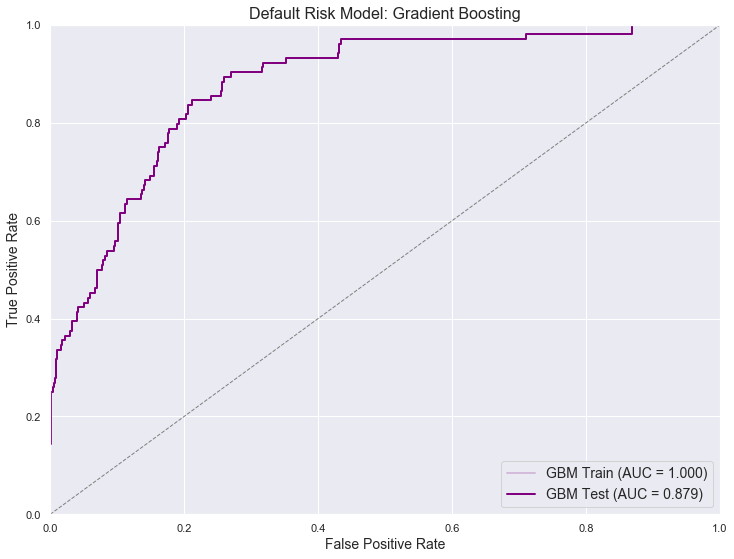

In [66]:
# ROC Curve
#The AUC for the train model is 1, so it is not visible on the chart.
plt.figure().set_size_inches(12, 9)

plt.plot(gbm_fpr_train, gbm_tpr_train, color='purple', lw=2, alpha = 0.2, linestyle = '-',
         label=f'GBM Train (AUC = {roc_auc_score(y_train, gbm_scores_train):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'GBM Test (AUC = {roc_auc_score(y_test, gbm_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('Default Risk Model: Gradient Boosting', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
plt.show();

In [67]:
gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]

roc_auc_score(y_train, gbm_scores_train)



1.0

In [68]:
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]


roc_auc_score(y_test, gbm_scores_test)

0.8788094655741714

In [74]:
gbm_rs.predict_proba(X_test)[:, 1].max()

0.8442513295375303

## Score Entire Dataset

In [76]:

gbm = GradientBoostingClassifier(random_state=314,n_estimators = 100, min_samples_leaf= 0.01, max_depth= 9, learning_rate = 0.05)

gbm.fit(X, y)

gbm_scores_final = gbm.predict_proba(X)[:, 1]

gbm_fpr_final, gbm_tpr_final, _ = roc_curve(y, gbm_scores_final)


In [77]:
gbm_scores_final = gbm_rs.predict_proba(X)[:, 1]

roc_auc_score(y, gbm_scores_final)


0.9413663544477959

In [78]:
y_preds = gbm_rs.predict(X)


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_preds)

array([[6294,    5],
       [ 102,   96]])

In [80]:
gbm_rs.predict_proba(X)[:, 1]

array([0.0030845 , 0.0016466 , 0.00207292, ..., 0.00157595, 0.00123153,
       0.00459634])

In [81]:
gbm_col= pd.DataFrame({"Scores":gbm_scores_final})


,Scores
0,0.003085
1,0.001647
2,0.002073
3,0.003521
4,0.003521


In [82]:
df_scores = df.join(gbm_col)

In [83]:
df_scores['decile'] = pd.qcut(df_scores['Scores'], 10, labels=np.arange(10, 0, -1))
df_scores.sort_values(['decile'],ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,test,wine type_White,Scores,decile
4239,5.7,0.28,0.36,1.8,0.041,38.0,90.0,0.99002,3.27,0.98,11.9,0,1,0.109215,1
1287,8.3,0.21,0.40,1.6,0.032,35.0,110.0,0.99070,3.02,0.60,12.9,0,1,0.080342,1
1289,6.6,0.16,0.30,1.6,0.034,15.0,78.0,0.99200,3.38,0.44,11.2,0,1,0.061154,1
2979,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,0,1,0.251473,1
1297,7.3,0.42,0.38,6.8,0.045,29.0,122.0,0.99250,3.19,0.37,12.6,0,1,0.114898,1


In [84]:
df_scores_info= df_scores.groupby('decile')['Scores'].describe()

df_model_summary = df_scores_info.rename(columns = {"count": "Num. Records", 
                                  "mean":"Avg. Score", 
                                  "min": "Min Score",
                                  "max": "Max Score" })
df_model_summary = df_model_summary.drop(['std','25%','50%','75%'],axis=1)

In [85]:
df_model_summary['Pect of Total Records'] = df_model_summary['Num. Records']/len(df_scores)

In [86]:
#note: the final model does not predict any positives
pred_class_one = pd.DataFrame(df_scores[df_scores['Scores']>=.5].groupby('decile')['Scores'].describe()['count'])
pred_class_one['Predict 1 Count'] = pred_class_one['count']
pred_class_one = pred_class_one.drop('count',axis=1)


In [87]:
high_quality_one = pd.DataFrame(df_scores[df_scores['test']==1].groupby('decile')['test'].describe()['count'])
high_quality_one['Actual HQ Count'] = high_quality_one['count']
high_quality_one = high_quality_one.drop('count',axis=1)


In [88]:
df_scores_join = df_model_summary.join(pred_class_one).join(high_quality_one)
df_scores_join

,Num. Records,Avg. Score,Min Score,Max Score,Pect of Total Records,Predict 1 Count,Actual HQ Count
decile,,,,,,,
10,650.0,0.000961,0.000500,0.001153,0.100046,0.0,0.0
9,651.0,0.001339,0.001153,0.001515,0.100200,0.0,2.0
8,648.0,0.001729,0.001515,0.001954,0.099738,0.0,1.0
7,650.0,0.002235,0.001954,0.002585,0.100046,0.0,0.0
6,650.0,0.003042,0.002585,0.003642,0.100046,0.0,0.0
5,650.0,0.004561,0.003644,0.005564,0.100046,0.0,4.0
4,650.0,0.007025,0.005565,0.008881,0.100046,0.0,3.0
3,651.0,0.011939,0.008882,0.016257,0.100200,0.0,10.0
2,647.0,0.025655,0.016257,0.040288,0.099584,0.0,27.0


In [89]:
df_scores_join['Predict 1 Perct'] = df_scores_join['Predict 1 Count']/df_scores_join['Num. Records']
df_scores_join['Actual HQ Perct'] = df_scores_join['Actual HQ Count']/df_scores_join['Num. Records']


In [90]:
model_summary = df_scores_join[['Num. Records','Pect of Total Records','Avg. Score','Min Score','Max Score',
                                'Predict 1 Count','Predict 1 Perct','Actual HQ Count','Actual HQ Perct']]

model_summary['Lift']= model_summary['Predict 1 Count']/len(df_scores[df_scores['Scores']>=.5])

/Users/liz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [91]:
model_summary
    

,Num. Records,Pect of Total Records,Avg. Score,Min Score,Max Score,Predict 1 Count,Predict 1 Perct,Actual HQ Count,Actual HQ Perct,Lift
decile,,,,,,,,,,
10,650.0,0.100046,0.000961,0.000500,0.001153,0.0,0.000000,0.0,0.000000,0.0
9,651.0,0.100200,0.001339,0.001153,0.001515,0.0,0.000000,2.0,0.003072,0.0
8,648.0,0.099738,0.001729,0.001515,0.001954,0.0,0.000000,1.0,0.001543,0.0
7,650.0,0.100046,0.002235,0.001954,0.002585,0.0,0.000000,0.0,0.000000,0.0
6,650.0,0.100046,0.003042,0.002585,0.003642,0.0,0.000000,0.0,0.000000,0.0
5,650.0,0.100046,0.004561,0.003644,0.005564,0.0,0.000000,4.0,0.006154,0.0
4,650.0,0.100046,0.007025,0.005565,0.008881,0.0,0.000000,3.0,0.004615,0.0
3,651.0,0.100200,0.011939,0.008882,0.016257,0.0,0.000000,10.0,0.015361,0.0
2,647.0,0.099584,0.025655,0.016257,0.040288,0.0,0.000000,27.0,0.041731,0.0
